In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# VGG

In [21]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [22]:
# https://keras.io/applications/
# InceptionV3
# InceptionResNetV2
# Google의 LeNet임. 학습된 가중치까지 제공해주고 있음.
# 전이학습: 훈련된 상태, 훈련의 가중치까지 제공해주고 있음.

In [23]:
vgg16 = VGG16(weights=None)

In [24]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [78]:
vgg16.load_weights('data/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [79]:
from keras.preprocessing import image

In [80]:
img = image.load_img('data/mozzi.jpg', target_size=(224,224))
x = image.img_to_array(img)
x = preprocess_input(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


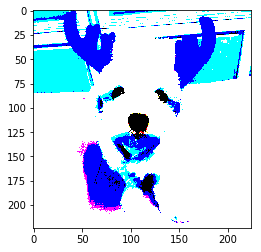

In [44]:
plt.imshow(x)

In [45]:
Xnew = np.array([x])
Xnew.shape

(1, 224, 224, 3)

In [46]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [47]:
Y_pred = vgg16.predict(Xnew)

In [58]:
# http://localhost:8888/edit/data/imagenet1000_clsid_to_human.txt 에서 153번째 행에 있는 걸로 예측한다는 것임.
#  153: 'Maltese dog, Maltese terrier, Maltese',
np.argmax(Y_pred, axis=1)

array([153])

In [59]:
# 92%의 확신을 갖고 있다는 말임.
np.max(Y_pred, axis=1)

array([0.9217767], dtype=float32)

In [60]:
car_img = image.load_img('data/bmw.jpeg', target_size=(224, 224))
x2 = image.img_to_array(car_img)
x2 = preprocess_input(x2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


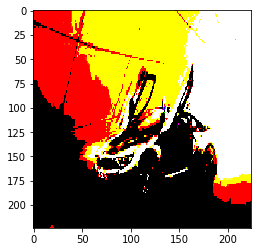

In [61]:
plt.imshow(x2)

In [62]:
xNew = np.array([x, x2])
xNew

array([[[[ -48.939003,   16.221   ,   45.32    ],
         [ -48.939003,   19.221   ,   47.32    ],
         [ -46.939003,   21.221   ,   51.32    ],
         ...,
         [  32.060997,   60.221   ,   76.32    ],
         [  31.060997,   55.221   ,   74.32    ],
         [  19.060997,   49.221   ,   69.32    ]],

        [[ -47.939003,   19.221   ,   49.32    ],
         [ -48.939003,   19.221   ,   50.32    ],
         [ -47.939003,   20.221   ,   51.32    ],
         ...,
         [  -3.939003,   33.221   ,   56.32    ],
         [  -2.939003,   31.221   ,   52.32    ],
         [  -2.939003,   33.221   ,   52.32    ]],

        [[ -50.939003,   15.221001,   49.32    ],
         [ -47.939003,   18.221   ,   52.32    ],
         [ -50.939003,   15.221001,   49.32    ],
         ...,
         [ 103.061   ,  111.221   ,  125.32    ],
         [ 111.061   ,  120.221   ,  131.32    ],
         [ 105.061   ,  120.221   ,  130.32    ]],

        ...,

        [[  55.060997,   32.221   ,   

In [63]:
Y_pred = vgg16.predict(Xnew)

In [64]:
np.argmax(Y_pred, axis=1)

array([153])

In [65]:
# imagenet1000_clsid_to_human.txt
np.argmax(Y_pred, axis=1)

array([153])

In [68]:
# 훈련된 weight를 저장할 수 있음.
vgg16.save_weights('trained/trained_weights.h5')

In [69]:
vgg16.layers[1].get_config()

{'name': 'block1_conv1',
 'trainable': True,
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [71]:
from keras.models import Model

In [82]:
layer1_model = Model(inputs=vgg16.input, outputs=vgg16.layers[1].output)

In [87]:
features = np.array([x])
features.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


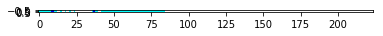

In [88]:
plt.imshow(features[:, :, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

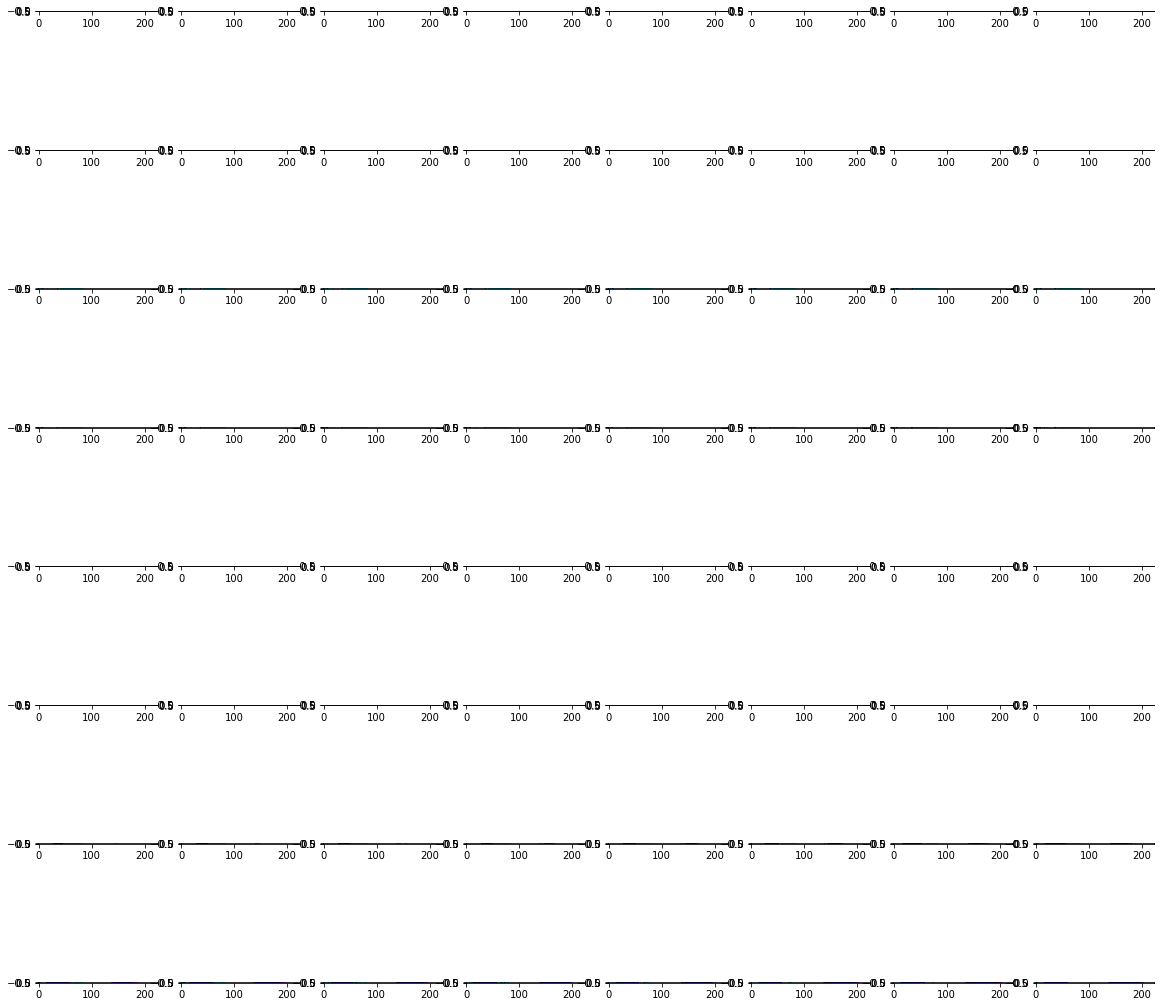

In [90]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(features[:, :, i])

In [91]:
# https://cloud.google.com/automl/

In [92]:
# 기계학습은 모델이라고 부르고
# 신경망에서는 framework라고 부른다.